In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [3]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train)
print(x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.01,
#     patience=1,
#     verbose=1,
#     mode='auto'
# )

# ref = model.fit(x_train, y_train, epochs=100, batch_size=200,
#                 validation_split=0.2, verbose=2, callbacks=[callback])

Epoch 1/100
240/240 - 1s - loss: 1.1299 - accuracy: 0.7250 - val_loss: 0.6818 - val_accuracy: 0.8298 - 818ms/epoch - 3ms/step
Epoch 2/100
240/240 - 0s - loss: 0.6007 - accuracy: 0.8399 - val_loss: 0.5225 - val_accuracy: 0.8539 - 337ms/epoch - 1ms/step
Epoch 3/100
240/240 - 0s - loss: 0.5132 - accuracy: 0.8573 - val_loss: 0.4907 - val_accuracy: 0.8644 - 316ms/epoch - 1ms/step
Epoch 4/100
240/240 - 0s - loss: 0.4757 - accuracy: 0.8671 - val_loss: 0.4650 - val_accuracy: 0.8661 - 312ms/epoch - 1ms/step
Epoch 5/100
240/240 - 0s - loss: 0.4521 - accuracy: 0.8726 - val_loss: 0.4462 - val_accuracy: 0.8723 - 328ms/epoch - 1ms/step
Epoch 6/100
240/240 - 0s - loss: 0.4335 - accuracy: 0.8791 - val_loss: 0.4122 - val_accuracy: 0.8859 - 310ms/epoch - 1ms/step
Epoch 7/100
240/240 - 0s - loss: 0.4260 - accuracy: 0.8815 - val_loss: 0.4186 - val_accuracy: 0.8847 - 310ms/epoch - 1ms/step
Epoch 7: early stopping


In [9]:
# def scheduler(epoch, learning_rate):
#     if epoch % 2 == 0 and epoch:
#         return 0.01 * learning_rate
#     return learning_rate

# callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

# ref = model.fit(x_train, y_train, epochs=100, batch_size=200,
#                 validation_split=0.2, verbose=2, callbacks=[callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/100
240/240 - 0s - loss: 0.4180 - accuracy: 0.8836 - val_loss: 0.4180 - val_accuracy: 0.8838 - lr: 0.0100 - 358ms/epoch - 1ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/100
240/240 - 0s - loss: 0.4109 - accuracy: 0.8866 - val_loss: 0.4268 - val_accuracy: 0.8802 - lr: 0.0100 - 310ms/epoch - 1ms/step

Epoch 3: LearningRateScheduler setting learning rate to 9.999999776482583e-05.
Epoch 3/100
240/240 - 0s - loss: 0.3904 - accuracy: 0.8941 - val_loss: 0.3951 - val_accuracy: 0.8917 - lr: 1.0000e-04 - 305ms/epoch - 1ms/step

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/100
240/240 - 0s - loss: 0.3800 - accuracy: 0.8975 - val_loss: 0.3937 - val_accuracy: 0.8917 - lr: 1.0000e-04 - 317ms/epoch - 1ms/step

Epoch 5: LearningRateScheduler setting learning rate to 9.999999747378752e-07.
Epoch 5/100
240/240 - 0s - loss: 0.378

In [8]:
import os

path = "./board"
if not os.path.isdir(path):
    os.mkdir(path)

logdir = path + '3101'

callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, update_freq='epoch',
                                          histogram_freq=10, write_images=True)

ret = model.fit(x_train, y_train, epochs=100, batch_size=200,
                validation_split=0.2, verbose=2, callbacks = [callback])

Epoch 1/100
240/240 - 1s - loss: 1.2320 - accuracy: 0.6615 - val_loss: 0.8077 - val_accuracy: 0.7682 - 941ms/epoch - 4ms/step
Epoch 2/100
240/240 - 0s - loss: 0.6928 - accuracy: 0.7962 - val_loss: 0.5928 - val_accuracy: 0.8350 - 367ms/epoch - 2ms/step
Epoch 3/100
240/240 - 0s - loss: 0.5476 - accuracy: 0.8466 - val_loss: 0.5064 - val_accuracy: 0.8583 - 363ms/epoch - 2ms/step
Epoch 4/100
240/240 - 0s - loss: 0.4983 - accuracy: 0.8577 - val_loss: 0.4693 - val_accuracy: 0.8692 - 357ms/epoch - 1ms/step
Epoch 5/100
240/240 - 0s - loss: 0.4772 - accuracy: 0.8646 - val_loss: 0.4393 - val_accuracy: 0.8780 - 347ms/epoch - 1ms/step
Epoch 6/100
240/240 - 0s - loss: 0.4613 - accuracy: 0.8688 - val_loss: 0.4389 - val_accuracy: 0.8774 - 321ms/epoch - 1ms/step
Epoch 7/100
240/240 - 0s - loss: 0.4523 - accuracy: 0.8715 - val_loss: 0.4402 - val_accuracy: 0.8763 - 333ms/epoch - 1ms/step
Epoch 8/100
240/240 - 0s - loss: 0.4455 - accuracy: 0.8734 - val_loss: 0.4350 - val_accuracy: 0.8765 - 332ms/epoch - 1

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
# init = tf.keras.initializers.he_normal()
# act = tf.keras.activations.relu

# init = tf.keras.initializers.he_normal()
# act = tf.keras.layers.LeakyReLU(alpha=0.3)

init = tf.keras.initializers.he_uniform()
act = tf.keras.layers.LeakyReLU(alpha=0.3)

In [7]:
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units=n, activation= act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation= act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation= act, kernel_initializer=init))
# 배치 정규화
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=n, activation= act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation= act, kernel_initializer=init))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=n, activation= act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10, activation='softmax', kernel_initializer=init))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                        

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
import os

path = "./board"
if not os.path.isdir(path):
    os.mkdir(path)

logdir = path + '3203'

file_writer = tf.summary.create_file_writer(logdir + "/gradient")
file_writer.set_as_default()

In [10]:
class GradientCallBack(tf.keras.callbacks.Callback):

    def __init__(self, freq=10):
        self.freq = freq

    def on_epoch_end(self, epoch, logs):
        if epoch % self.freq != 0:
            return
        with tf.GradientTape() as tape:
            y_pred = model(x_train)
            loss = tf.keras.losses.binary_crossentropy(y_train, y_pred)
        grads = tape.gradient(loss, model.trainable_weights)
        
        for n in range(1, len(model.layers)):
            i2 = (n-1) * 2
            i1 = i2 + 1

            bias_avg = tf.reduce_mean(tf.abs(grads[i1]))
            weight_avg = tf.reduce_mean(tf.abs(grads[i2]))

            tf.summary.scalar("layer+%d/avg/bias"%n, data=bias_avg, step = epoch)
            tf.summary.scalar("layer+%d/avg/weight"%n, data=weight_avg, step = epoch)

            tf.summary.histogram("layer_%d/hist/bias"%n, data = grads[i1], step = epoch)
            tf.summary.histogram("layer_%d/hist/weight"%n, data = grads[i2], step = epoch)

    def on_train_end(self, logs):
        tf.summary.flush()

In [11]:
callback1 = GradientCallBack()
callback2 = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=10)

ret = model.fit(x_train, y_train, epochs=101, batch_size=200,
                validation_split=0.2, verbose=2, callbacks=[callback1, callback2])

train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/101
240/240 - 3s - loss: 0.3037 - accuracy: 0.9084 - val_loss: 0.2343 - val_accuracy: 0.9393 - 3s/epoch - 14ms/step
Epoch 2/101
240/240 - 1s - loss: 0.1643 - accuracy: 0.9489 - val_loss: 0.2039 - val_accuracy: 0.9461 - 838ms/epoch - 3ms/step
Epoch 3/101
240/240 - 1s - loss: 0.1387 - accuracy: 0.9572 - val_loss: 0.1567 - val_accuracy: 0.9544 - 847ms/epoch - 4ms/step
Epoch 4/101
240/240 - 1s - loss: 0.1097 - accuracy: 0.9663 - val_loss: 0.1740 - val_accuracy: 0.9529 - 933ms/epoch - 4ms/step
Epoch 5/101
240/240 - 1s - loss: 0.0942 - accuracy: 0.9711 - val_loss: 0.1657 - val_accuracy: 0.9591 - 956ms/epoch - 4ms/step
Epoch 6/101
240/240 - 1s - loss: 0.0821 - accuracy: 0.9743 - val_loss: 0.1297 - val_accuracy: 0.9672 - 903ms/epoch - 4ms/step
Epoch 7/101
240/240 - 1s - loss: 0.0783 - accuracy: 0.9757 - val_loss: 0.1334 - val_accuracy: 0.9635 - 944ms/epoch - 4ms/step
Epoch 8/101
240/240 - 1s - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.1068 - val_accuracy: 0.9722 - 1s/epoch - 4ms/st

In [13]:
act = "relu"
init =  "he_uniform"
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units = n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units = n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
opt = 'rmsprop'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
ret = model.fit(x_train, y_train, epochs=101, batch_size=400,
                validation_data=(x_test, y_test), verbose = 0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

1875/1875 - 2s - loss: 7.2251e-06 - accuracy: 1.0000 - 2s/epoch - 853us/step
313/313 - 0s - loss: 0.1394 - accuracy: 0.9806 - 278ms/epoch - 888us/step


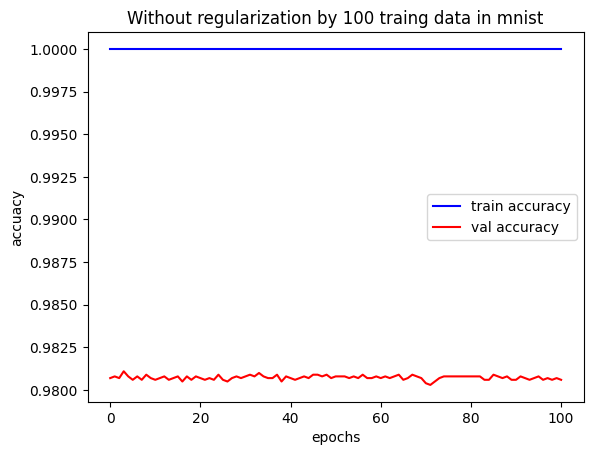

In [46]:
plt.title("Without regularization by %s traing data in mnist"%n)
plt.plot(ret.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(ret.history['val_accuracy'], 'r-', label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuacy')
plt.legend(loc = 'best')
plt.show()

In [48]:
reg = tf.keras.regularizers.l2(0.01)    
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init, kernel_regularizer=reg))
model2.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init, kernel_regularizer=reg))
model2.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init, kernel_regularizer=reg))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 99710 (389.49 KB)
Trainable params: 99710 (389.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
ret2 = model2.fit(x_train, y_train, epochs=201, batch_size=400,
                  validation_data=(x_test, y_test), verbose=0)

In [61]:
train_loss2, train_acc2 = model2.evaluate(x_train, y_train, verbose=2)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)

1875/1875 - 2s - loss: 0.1792 - accuracy: 0.9799 - 2s/epoch - 963us/step
313/313 - 0s - loss: 0.1969 - accuracy: 0.9736 - 314ms/epoch - 1ms/step


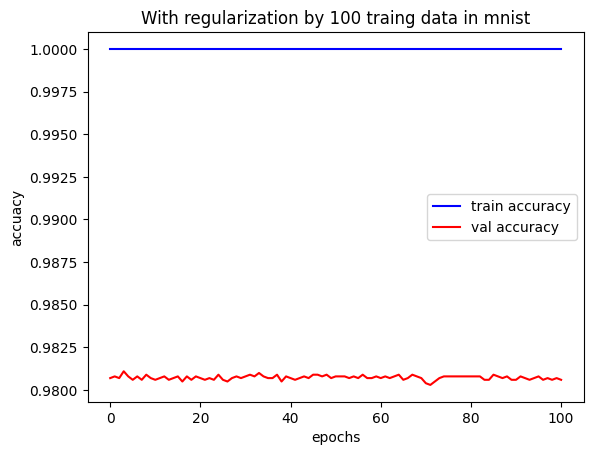

In [62]:
plt.title("With regularization by %s traing data in mnist"%n)
plt.plot(ret.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(ret.history['val_accuracy'], 'r-', label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuacy')
plt.legend(loc = 'best')
plt.show()

In [66]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units = 4))
model.add(tf.keras.layers.Dropout(rate = 0.5))
model.add(tf.keras.layers.Dense(units = 4))
model.add(tf.keras.layers.Dropout(rate = 0.25))
model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dropout_8 (Dropout)         (None, 4)                 0         
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dropout_9 (Dropout)         (None, 4)                 0         
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 

In [67]:
n = 100
dropout_rate = 0.2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate = dropout_rate))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate = dropout_rate))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 100)               78500     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 896

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
ret = model.fit(x_train, y_train, epochs=201, batch_size=400,
                validation_data=(x_test, y_test), verbose = 0)

In [70]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1875/1875 - 2s - loss: 3.2628e-04 - accuracy: 1.0000 - 2s/epoch - 952us/step
313/313 - 0s - loss: 0.1077 - accuracy: 0.9825 - 282ms/epoch - 900us/step


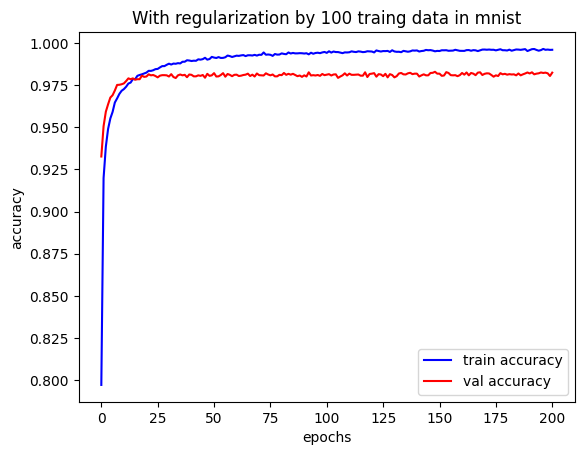

In [71]:
plt.title("With regularization by %s traing data in mnist"%n)
plt.plot(ret.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(ret.history['val_accuracy'], 'r-', label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()